In [137]:
import re
import pandas as pd

In [138]:
import pandas as pd

# Specify the column names based on adult.names file
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load the dataset using adult.data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Data_set = pd.read_csv(data_url, names=column_names, na_values=" ?", skipinitialspace=True)

# Display the first few rows of the dataframe
(Data_set.head())


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:
print("No of rows in dataset before preprocessing : ", len(Data_set))

No of rows in dataset before preprocessing :  32561


### Find duplicates

In [140]:
Data_set.duplicated().values.any()

True

In [141]:
print("Duplicate Rows except first occurrence:")

duplicates = Data_set[Data_set.duplicated()]
duplicates

Duplicate Rows except first occurrence:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Drop duplicates

In [142]:
# Drop duplicates
Data_set_no_duplicates = Data_set.drop_duplicates()
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [143]:
print("No of rows in dataset after removing duplicates : ", len(Data_set_no_duplicates))

No of rows in dataset after removing duplicates :  32537


### Handle categorical variables

In [144]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Data_set_no_duplicates = Data_set_no_duplicates.copy()  # Create a copy of the DataFrame
Data_set_no_duplicates['income'] = label_encoder.fit_transform(Data_set_no_duplicates['income'])


In [145]:
Data_set_no_duplicates

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<Figure size 10000x5000 with 0 Axes>

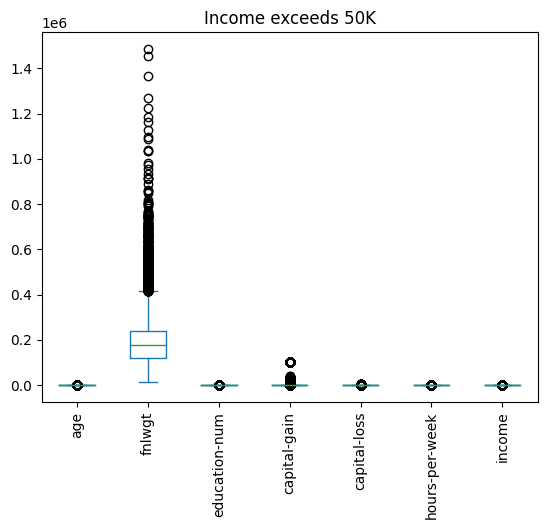

In [146]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(100, 50))
Data_set_no_duplicates.plot.box(title='Income exceeds 50K',rot=90)

plt.show()

### Making all the outliers as null values from IQR technique

In [147]:
# import numpy as np

# # Function to replace outliers with null values based on IQR
# def handle_outliers_iqr(column):
#     Q1 = column.quantile(0.25)
#     Q3 = column.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     column[(column < lower_bound) | (column > upper_bound)] = np.nan
#     return column

# # Apply the outlier handling function to numeric columns
# numeric_columns = Data_set_no_duplicates.select_dtypes(include=['int64', 'float64']).columns
# Data_set_no_duplicates[numeric_columns] = Data_set_no_duplicates[numeric_columns].apply(handle_outliers_iqr, axis=0)

# # Display the modified DataFrame
# print("Dataset after handling outliers:")
# (Data_set_no_duplicates)

### Finding null values in the dataset

In [148]:
Data_set_no_duplicates.isna().sum().any()

False

In [149]:
Data_set_no_duplicates.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [150]:
# Check for null values in the dataset
null_values = Data_set_no_duplicates.isnull().sum()

# Display columns with null values and their counts
print("Columns with null values:")
print(null_values[null_values > 0])

# Display total count of null values
print("\nTotal null values in the dataset:", null_values.sum())


Columns with null values:
Series([], dtype: int64)

Total null values in the dataset: 0


### Removing all the null values

In [151]:
df2 = Data_set_no_duplicates.dropna()
df2=Data_set_no_duplicates.dropna(axis=0)

# Reset index after drop
df2=Data_set_no_duplicates.dropna().reset_index(drop=True)

Data_set_no_duplicates = df2
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Summary of dataset before performing standard scalar

In [152]:
df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Standard Deviation of each numeric column:
age                   13.637984
fnlwgt            105556.471009
education-num          2.571633
capital-gain        7387.957424
capital-loss         403.101833
hours-per-week        12.346889
dtype: float64


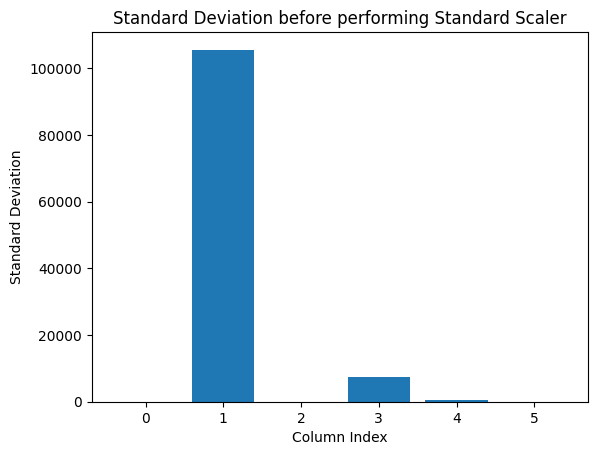

In [153]:
# Select only numeric columns
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of numeric columns
std_deviation_numeric = numeric_columns.std()

# Display the standard deviation for each numeric column
print("Standard Deviation of each numeric column:")
print(std_deviation_numeric)

plt.bar(range(len(std_deviation_numeric)), std_deviation_numeric)
plt.title("Standard Deviation before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each numeric column:
age                   38.585549
fnlwgt            189780.848511
education-num         10.081815
capital-gain        1078.443741
capital-loss          87.368227
hours-per-week        40.440329
dtype: float64


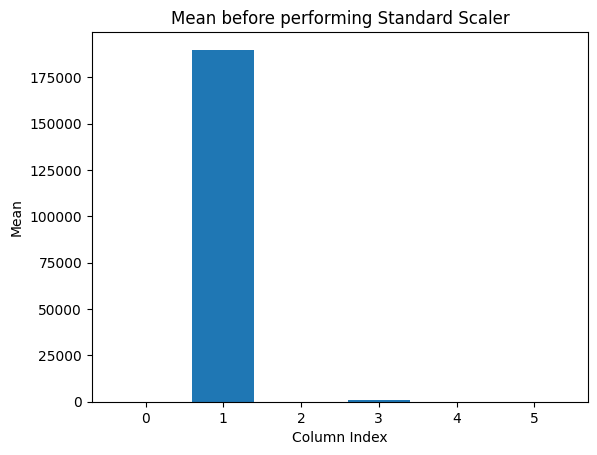

In [154]:
# Calculate the mean of numeric columns
mean_values = numeric_columns.mean()

# Display the mean for each numeric column
print("Mean of each numeric column:")
print(mean_values)

# Plot the mean of all columns
plt.bar(range(len(mean_values)), mean_values)
plt.title("Mean before performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()

In [155]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns using StandardScaler
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Concatenate the scaled numeric columns with non-numeric columns
final_scaled_data = pd.concat([scaled_df, df2.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the dataset after standard scaling
print("Dataset after standard scaling:")
(final_scaled_data)


Dataset after standard scaling:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


Standard Deviation of each scaled numeric column:
age               1.000015
fnlwgt            1.000015
education-num     1.000015
capital-gain      1.000015
capital-loss      1.000015
hours-per-week    1.000015
dtype: float64


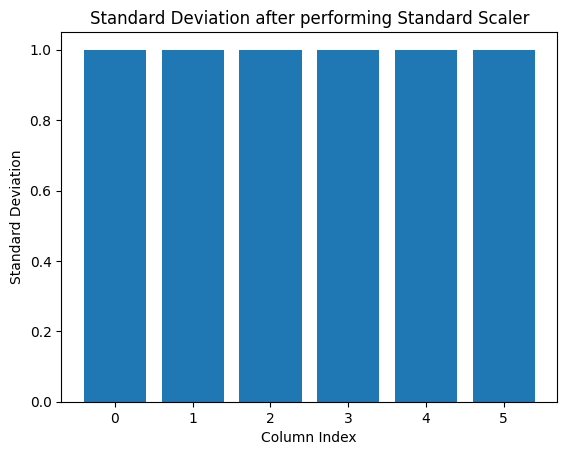

In [156]:
# Select only the scaled numeric columns
scaled_numeric_columns = final_scaled_data.select_dtypes(include=['int64', 'float64'])

# Calculate the standard deviation of scaled numeric columns
std_deviation_scaled = scaled_numeric_columns.std()

# Display the standard deviation for each scaled numeric column
print("Standard Deviation of each scaled numeric column:")
print(std_deviation_scaled)

# Plot the standard deviation of all columns
plt.bar(range(len(std_deviation_scaled)), std_deviation_scaled)
plt.title("Standard Deviation after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Standard Deviation")
plt.show()


Mean of each scaled numeric column:
age              -7.555945e-17
fnlwgt           -1.255685e-16
education-num     2.849858e-17
capital-gain      3.646945e-17
capital-loss      4.367598e-19
hours-per-week   -6.485884e-17
dtype: float64


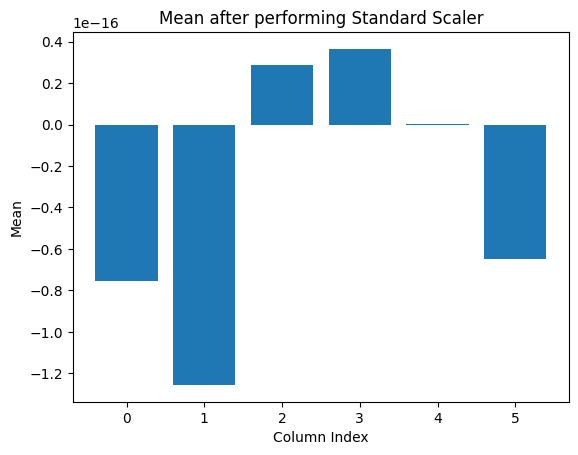

In [157]:
# Calculate the mean of scaled numeric columns
mean_values_scaled = scaled_numeric_columns.mean()

# Display the mean for each scaled numeric column
print("Mean of each scaled numeric column:")
print(mean_values_scaled)

# Plot the mean of all columns
plt.bar(range(len(mean_values_scaled)), mean_values_scaled)
plt.title("Mean after performing Standard Scaler")
plt.xlabel("Column Index")
plt.ylabel("Mean")
plt.show()


### Summary of the dataset after standard scaling

In [158]:
# Display a summary of the dataset after standard scaling
summary_after_scaling = final_scaled_data.describe()

# Transpose the summary for better readability
summary_after_scaling = summary_after_scaling.T

# Display the summary
print("Summary of the dataset after standard scaling:")
(summary_after_scaling)


Summary of the dataset after standard scaling:


,count,mean,std,min,25%,50%,75%,max
age,32537.0,-7.555945e-17,1.000015,-1.582777,-0.776193,-0.116262,0.690322,3.770003
fnlwgt,32537.0,-1.255685e-16,1.000015,-1.681551,-0.681673,-0.108236,0.447276,12.267785
education-num,32537.0,2.849858e-17,1.000015,-3.531590,-0.420679,-0.031815,0.745913,2.301369
capital-gain,32537.0,3.646945e-17,1.000015,-0.145975,-0.145975,-0.145975,-0.145975,13.389638
capital-loss,32537.0,4.367598e-19,1.000015,-0.216743,-0.216743,-0.216743,-0.216743,10.589625
hours-per-week,32537.0,-6.485884e-17,1.000015,-3.194403,-0.035664,-0.035664,0.369303,4.742941
income,32537.0,2.409257e-01,0.427652,0.000000,0.000000,0.000000,0.000000,1.000000


### Performing PCA to the dataset

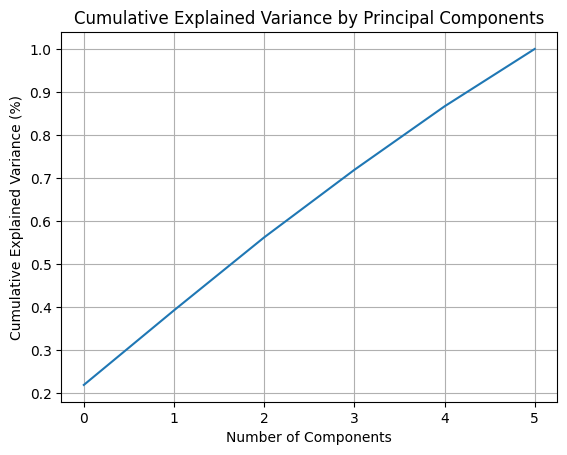

In [159]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

numeric_columns_for_pca = final_scaled_data.select_dtypes(include=['int64', 'float64'])

pca = PCA()
principalComponents = pca.fit_transform(numeric_columns_for_pca)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [160]:

threshold = 0.95
num_components_threshold = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1
print("Number of components to retain for {}% variance:".format(threshold * 100), num_components_threshold)


Number of components to retain for 95.0% variance: 6


In [161]:
num_components_to_retain = 6

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components_to_retain)
pca_result_final = pca.fit_transform(numeric_columns_for_pca)

# Create a DataFrame with the selected principal components
pca_components_df = pd.DataFrame(data=pca_result_final, columns=[f"PC{i+1}" for i in range(num_components_to_retain)])

# Concatenate the principal components with non-numeric columns
final_data_with_pca = pd.concat([pca_components_df, final_scaled_data.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the dataset with PCA components
print("Dataset with PCA components:")
(final_data_with_pca)

Dataset with PCA components:


,PC1,PC2,PC3,PC4,PC5,PC6,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.846447,-0.198935,-0.508772,-1.012826,0.450111,-0.496738,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,-0.098285,-0.900967,-1.158982,-0.197988,1.818805,-1.581607,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,-0.436584,0.101922,-0.040861,0.191709,-0.252603,0.072062,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,-0.482672,-0.325446,-0.542262,1.292054,-0.696598,0.128679,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,-0.104474,1.263595,1.189893,-0.185116,0.212691,-0.916223,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.268029,0.783948,0.697988,-0.506745,0.314129,-0.515307,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32533,-0.258301,-0.262746,-0.400785,-0.045653,-0.218524,0.153564,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32534,0.251380,-0.739202,-0.924258,0.796700,-0.453598,-0.312223,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32535,-1.686295,0.224161,0.001366,-0.404757,1.190741,0.042698,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


In [162]:
print(pca.explained_variance_)


[1.31064927 1.04096208 1.01859553 0.94228261 0.88631882 0.8013761 ]


In [163]:
print(pca.components_)

[[ 0.38243879 -0.2105136   0.55120092  0.41506352  0.26692672  0.51193217]
 [-0.35144776  0.5394343   0.17782241  0.52410334 -0.51100062  0.13441855]
 [-0.38737588  0.52218419  0.218196   -0.32475895  0.6160794   0.21126264]
 [ 0.64834137  0.57270697 -0.36484285  0.22045067  0.21867752 -0.14876673]
 [-0.17994677 -0.10416973  0.29219617  0.42510107  0.35364441 -0.75207309]
 [-0.35698402 -0.23059429 -0.63123556  0.46718323  0.33939718  0.29576973]]


# Build the predictive model using Naive Bayes Algorithm

In [164]:
from sklearn.model_selection import train_test_split

# Assuming 'final_data_with_pca' is your dataset with PCA components and other features
# Replace it with your actual dataset

# Identify the features (X) and target variable (y)
X = final_data_with_pca.drop('income', axis=1)  # Replace 'target_variable_column' with the actual column name
y = final_data_with_pca['income']

# Split the dataset into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (26029, 14)
Shape of X_test: (6508, 14)
Shape of y_train: (26029,)
Shape of y_test: (6508,)


In [165]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB

# Identify the features (X) and target variable (y)
X = final_data_with_pca.drop('income', axis=1)
y = final_data_with_pca['income']

# One-hot encode categorical features
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)

# Concatenate one-hot encoded features with the numeric features
X_encoded = pd.concat([X.drop(categorical_columns, axis=1), X_categorical], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naïve Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training set
naive_bayes_classifier.fit(X_train, y_train)


GaussianNB()

In [166]:
# Predict the test set results
y_pred = naive_bayes_classifier.predict(X_test)

In [167]:
# Assuming you have scikit-learn installed, you can use metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.37      0.54      4905
           1       0.33      0.96      0.49      1603

    accuracy                           0.52      6508
   macro avg       0.65      0.66      0.51      6508
weighted avg       0.81      0.52      0.52      6508



In [168]:
# Evaluate the model on the training set
# Make predictions on the training set
y_train_pred = naive_bayes_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on the training set:", accuracy_train)

Accuracy on the training set: 0.5163471512543701


In [169]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.5152120467117394


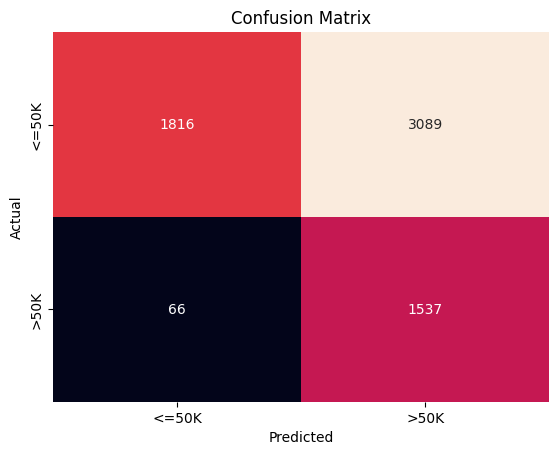

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


True Positive: 2533 instances that are <=50K and it is correctly predicted

False Positive: 478 instances that are >50k and it is incorrectly predicted

True Negative: 534 instances that are >50k and correctly predicted

False Negative: 252 instances that are <=50k and it is incorrectly predicted
